## Project Title: MNIST Classification using PyTorch CNN

### 1. Data Collection 🗂
- Load dataset
- Initial data exploration

### 2. Data Splitting 📊
- Train-test split
- Validation set creation if needed

### 3. Model Training ⚙️
- Define model architecture
- Set hyperparameters
- Training loop
- Loss tracking

### 4. Model Evaluation 📈
- Accuracy metrics
- Performance visualization

### 5. Predictions 🎯
- Test predictions
- Results analysis

### 6. Model Persistence 💾
- Save trained model
- Save scaler/encoder if used

### 7. Model Loading & Usage 🔄
- Load saved model
- Make new predictions

## Convolutional Neural Networks (CNN)

### Introduction 🔍
- Deep learning architecture for grid-like data processing
- Specializes in spatial pattern recognition

### Why CNN? 🤔
- More efficient than regular neural networks. There will be tons of inputs and parameters, takes too long to do, too much of compute resources especially large size images
- Reduces parameters through convolution layers
- Optimizes with pooling layer (down sampling)

### Components ⚙️

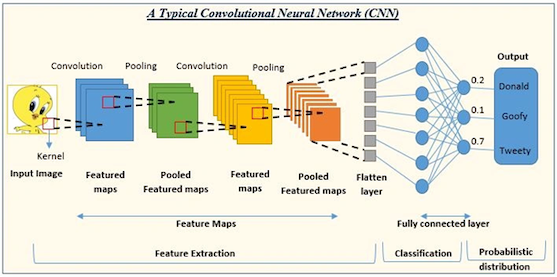

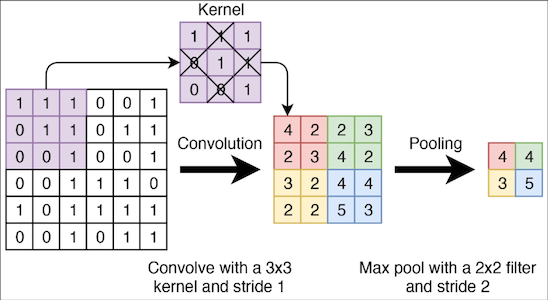


### Applications
- **Image Processing:** Classification, Object detection, Face recognition, Medical imaging
- **Video Analysis:** Action recognition, Motion tracking
- **Text & Signal Processing:** NLP tasks, Speech recognition

## References
- [MNIST Dataset Documentation](https://www.tensorflow.org/datasets/catalog/mnist)

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. DATA COLLECTION - LOAD DATA

# Convert MNIST image files into a Tensor 4-dimensions (no_of_images, height, width, color_channel)
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
# 2. DATA SPLITTING - TRAIN, TEST & SPLIT! 

# Create data loaders with smaller batch size (eg. 10)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [6]:
# 3. MODEL TRAINING

from models.MNISTClassifierCNN import MNISTClassifierCNN

# Pick a Manual seed for randomization, like start from this neuron. 
# The seed and random_state could have potential impact on predictions
torch.manual_seed(41)

model = MNISTClassifierCNN()

model

MNISTClassifierCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()

# Set hyperparameters - The smaller the Learning Rate (lr), the longer it takes to train
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
import time

start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Training Loop
for epoch in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Model Training - X_train: features, y_train: target
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train) # Predicted value from train set. It is 2d not flatten
        
        loss = criterion(y_pred, y_train) # How far we are from predictions to correct answer
        
        # From the predictions tuple, get the max number which is the correct one
        # E.g. tensor([-6.7608,  2.7754,  4.5281]), here 4.5281 is max
        predicted = torch.max(y_pred.data, 1)[1]
        
        # How many correct predictions in this batch. True = 1, False = 0, sum those true values
        batch_corr = (predicted == y_train).sum() 
        
        train_corr += batch_corr # Track total correct predictions from train data set from all the batches
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print results at regular batch intervals
        if b%600 == 0:
            print(f'Epoch: {epoch}, Batch: {b} Loss: {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(train_corr)
    
    # 4. MODEL EVALUATION - EVALUATE / VALIDATE MODEL ON TEST DATA SET
    
    # no_grad() - It won't update weights & biases on test data
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_eval = model(X_test)
            
            # Extract predicted data
            predicted = torch.max(y_eval.data, 1)[1]
            
            test_corr += (predicted == y_test).sum() # T=1, F=0, sum it up
            
    loss = criterion(y_eval, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)
                   
current_time = time.time()
total_time = current_time - start_time
print(f'\nTraining took: {total_time/60} minutes')

Epoch: 0, Batch: 600 Loss: 0.16236090660095215
Epoch: 0, Batch: 1200 Loss: 0.1614551544189453
Epoch: 0, Batch: 1800 Loss: 0.5041669607162476
Epoch: 0, Batch: 2400 Loss: 0.10426308214664459
Epoch: 0, Batch: 3000 Loss: 0.007077544927597046
Epoch: 0, Batch: 3600 Loss: 0.3652905821800232
Epoch: 0, Batch: 4200 Loss: 0.0037760832346975803
Epoch: 0, Batch: 4800 Loss: 0.0013758999994024634
Epoch: 0, Batch: 5400 Loss: 0.04505983740091324
Epoch: 0, Batch: 6000 Loss: 0.0005676982691511512
Epoch: 1, Batch: 600 Loss: 0.0040985336527228355
Epoch: 1, Batch: 1200 Loss: 0.26344460248947144
Epoch: 1, Batch: 1800 Loss: 0.0015710301231592894
Epoch: 1, Batch: 2400 Loss: 0.002920893719419837
Epoch: 1, Batch: 3000 Loss: 0.025759723037481308
Epoch: 1, Batch: 3600 Loss: 0.5109620094299316
Epoch: 1, Batch: 4200 Loss: 0.03832785040140152
Epoch: 1, Batch: 4800 Loss: 0.0004107930581085384
Epoch: 1, Batch: 5400 Loss: 0.00042201072210446
Epoch: 1, Batch: 6000 Loss: 0.4828798770904541
Epoch: 2, Batch: 600 Loss: 0.051

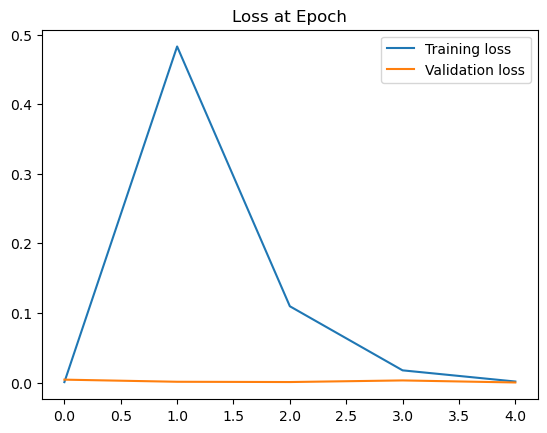

In [9]:
# Loss Tracking

# Convert tensors to python list
train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.title('Loss at Epoch')
plt.legend()

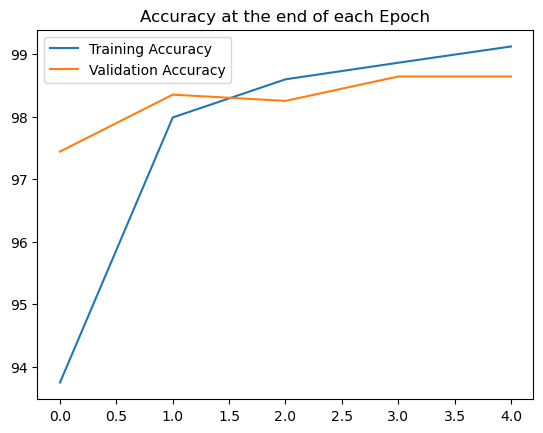

In [10]:
# Accuracy Metrics

plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at the end of each Epoch')
plt.legend()

In [11]:
# 6. PREDICTIONS

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for (X_test, y_test) in test_load_all:
        y_eval = model(X_test)
        predicted = torch.max(y_eval.data, 1)[1]
        correct += (predicted == y_test).sum()
        
correct = correct.item()/len(test_data) * 100

print(f'Correct {correct} %')
        

Correct 98.64 %


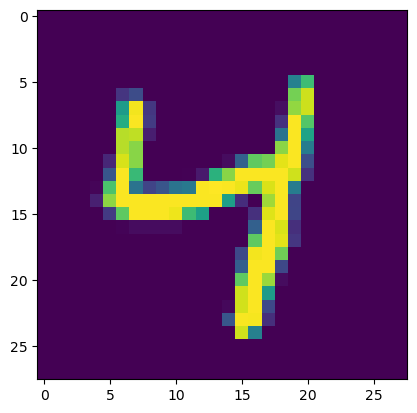

In [12]:
# Random image prediction (Below is the image for which it should predict the number)

random_image = test_data[1978][0]
plt.imshow(random_image.reshape(28, 28))


In [13]:
model.eval()
with torch.no_grad():
    new_prediction = model(random_image.view(1,1,28,28)) # (batch_size, color_channel, 28X28 image)
    
    
new_prediction = new_prediction.argmax(dim=1, keepdim=True)

print(new_prediction)

tensor([[4]])
